# Between the tables

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 27](https://img.shields.io/badge/Jump%20to-Level%2027-blue?style=flat-square)](http://www.pythonchallenge.com/pc/hex/speedboat.html)

<center><img src="../../resources/imgs/Quiz27-1.png" /></center>

In [1]:
from requests import get
from bs4 import BeautifulSoup as Soup

In [2]:
response = get(
    'http://www.pythonchallenge.com/pc/hex/speedboat.html',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
response = Soup(response.text, features='html5lib')
print(response.prettify())

<html>
 <head>
  <title>
   between the tables
  </title>
  <link href="../style.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <center>
   <br/>
   <br/>
   <a href="../ring/bell.html">
    <img src="zigzag.jpg"/>
    <!-- did you say gif? -->
   </a>
  </center>
 </body>
</html>
<!-- oh, and this is NOT a repeat of 14 -->
<!--
Join us at the IRC: irc.freenode.net #pythonchallenge
-->



&emsp;&emsp;关卡源代码中出现了`<a />`代码段，其直接指向下一关卡的链接。点击链接，需要输入新的用户名和密码用于登录，那么第27关应该是需要我们通过解谜获得用户名和密码，关键词共有2个。同时，源代码给我们提示了文件`zigzag.gif`，先去这里看看。

In [3]:
from io import BytesIO
from PIL import Image

Mode of image: P


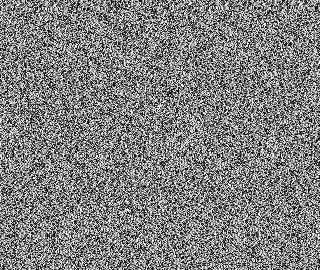

In [4]:
response = get(
    'http://www.pythonchallenge.com/pc/hex/zigzag.gif',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
gif = Image.open(BytesIO(response.content))
print('Mode of image:', gif.mode)
display(gif)

&emsp;&emsp;可以看到，这张图片如同花屏的老电视一样，根本无法传递任何信息。但请注意，图片的存储模式为`P`，也就是处在`palette`（索引颜色模式），原本需要4B/px的RGBA全彩图像只需要1B/px的索引外加一定长度的色彩索引表就能正确表达。既然知道了这种图像模式，我们需要通过色彩索引对图像进行还原。

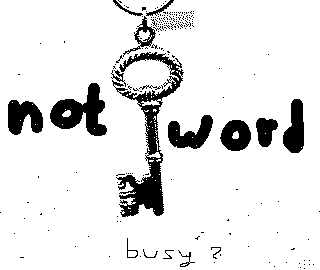

In [5]:
""" 获取图像二进制数据 """
data = gif.tobytes()
converted = gif.convert('L').tobytes()
""" 对齐转换后的数据，寻找差异 """
zipped = list(zip(data[1:], converted[:-1]))
indices = [i for (i, p) in enumerate(zipped) if p[0] != p[1]]
new = Image.new('L', gif.size)
color = [255,] * len(data)
for i in indices:
    color[i] = 0
new.putdata(color)
display(new)

&emsp;&emsp;图片的意思是`Not keyword`，并不是下一关的账号和密码。试试由差异组成的信息。

In [6]:
from bz2 import decompress
from keyword import iskeyword

In [7]:
differences = [p[0] for p in zipped if p[0] != p[1]]
text = decompress(bytes(differences)).decode()
print(set(i for i in text.split() if not iskeyword(i)))

{'../ring/bell.html', 'print', 'repeat', 'exec', 'switch'}


&emsp;&emsp;在上面5个元素中，`repeat`和`switch`是用户名和密码。